In [69]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://4.bp.blogspot.com/-T6hVA66rPqE/WZLZoDdaKkI/AAAAAAAAbKQ/xsXqK2UvBaU0MPdnkriHymsXLdC7Qf62gCLcBGAs/s1600/itd.png")

## Analisis de Datos
## Análisis de correlación en Python
## José Gabriel Rodriguez Rivas
## Guillermo Villarreal Gallegos

In [28]:
import pandas as pd
import numpy as np
import sklearn
#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("titanic-train.csv")

Con los datos de arriba, ¿qué tipos de preguntas podemos hacer acerca de los factores que contribuyeron a que los pasajeros sobrevivan o fallecieran en la catástrofe del Titanic? el genero y el numero de cabina es importante

In [29]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    object 
 5   Age          738 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 85.9+ KB


¿Faltan valores en el conjunto de datos? algunos como valores de cabina y de edad, en el head de abajo se aprecia mejor 

In [30]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


# Paso 2: Preparar los datos para el modelo de árbol de decisiones

In [31]:
training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [32]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


In [33]:
training["Age"].fillna(training["Age"].mean(), inplace=True)

In [34]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    int64  
 5   Age          915 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 85.9+ KB


In [71]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.000000,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,29.970867,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.000000,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.000000,0,0,7553,9.8375,NaN,S


¿Cuál es el valor que se utilizó para reemplazar a las edades faltantes?

29.970867

# Paso 3: Entrenar y calificar el modelo del árbol de decisiones.

a) Cree un objeto de arreglo con la variable que será el objetivo del modelo.

El propósito del modelo es clasificar a los pasajeros como sobrevivientes o víctimas fatales. El conjunto de datos identifica sobrevivientes y víctimas fatales. El modelo deducirá qué valores variables de entrada tienen más probabilidad de pertenecer a las víctimas fatales y a los sobrevivientes. Luego, usted podrá utilizar dicha información para clasificar pasajeros de un conjunto de datos único de prueba.

In [36]:
y_target = training["Survived"].values

In [37]:
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [38]:
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_in
clf_train = clf_train.fit(X_input, y_target)

In [39]:
clf_train.score(X_input,y_target)

0.8163934426229508

# Paso 6: Visualizar el árbol

a) Cree el resultado del archivo intermedio.

Importe el módulo sklearn.externals.six StringIO que se utiliza para generar las características del árbol de decisiones en un archivo. Crearemos un archivo dot de Graphviz que nos permitirá exportar los resultados del clasificador en un formato que se puede convertir en gráfico.

In [40]:
clasificacion = ['No Sobrevive', 'Sobrevive']

In [41]:
import sklearn
import graphviz
with open("titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns,
                          class_names = clasificacion)

In [43]:
!dot -Tpng titanic.dot -o titanic.png

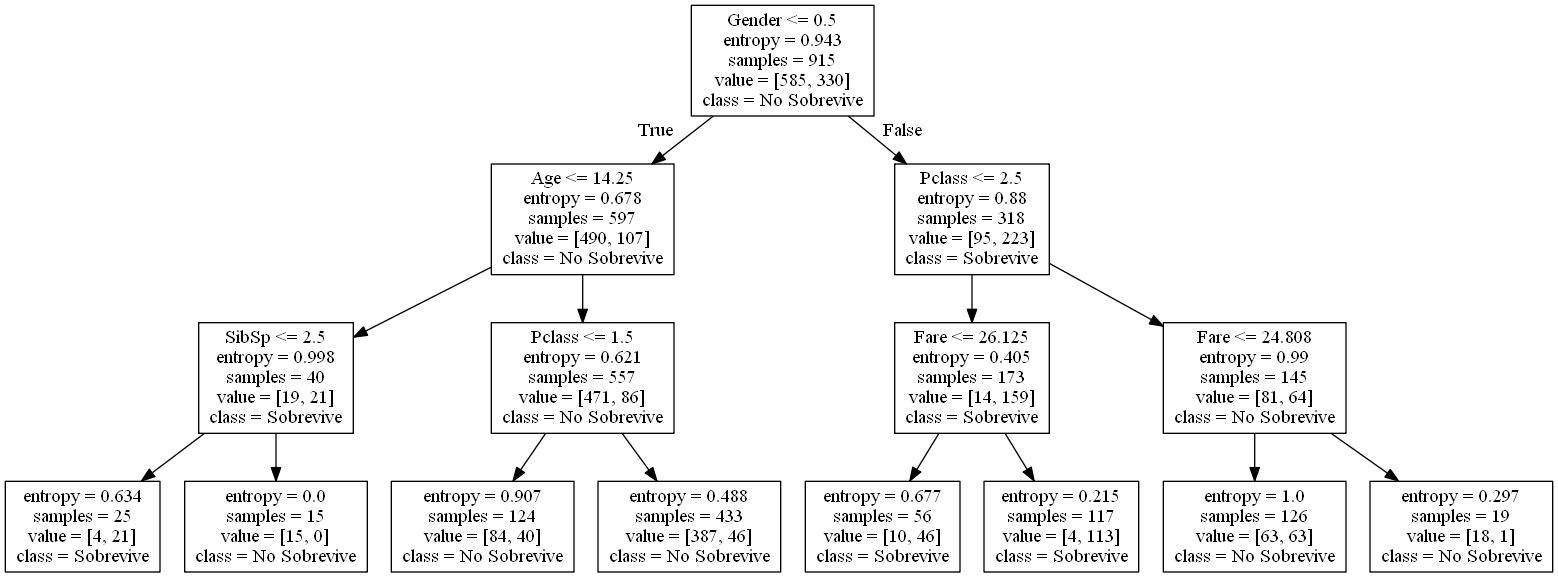

In [44]:
from IPython.display import Image

#display the decison tree graphic
Image("titanic.png")

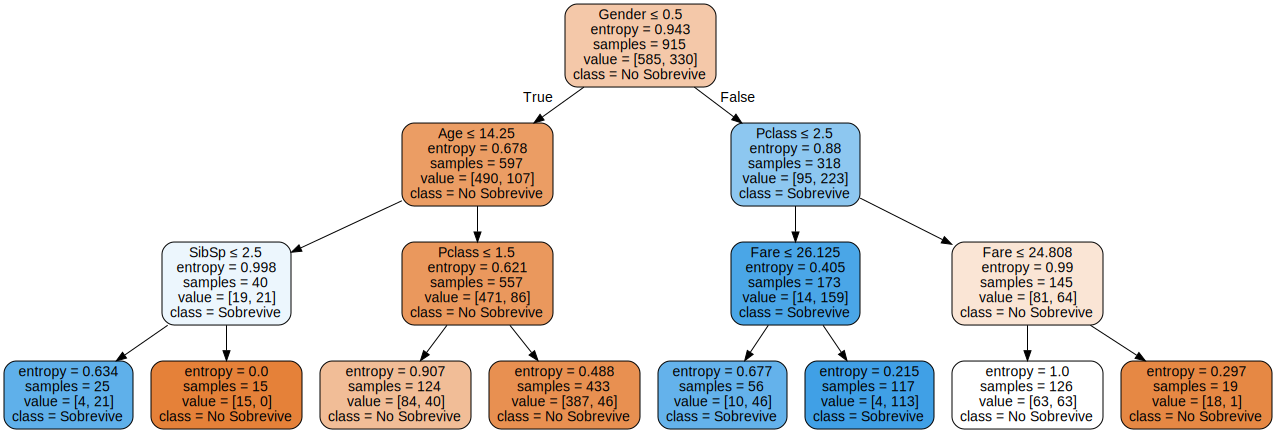

In [45]:
dot_data = tree.export_graphviz(clf_train, out_file=None,
                               class_names = clasificacion,
                               feature_names = columns,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("TITATNICCOLOR", format='png')
graph

* ¿Qué describe al grupo que tenía mayor cantidad de víctimas fatales? 
 El grupo con mayor nuemro de muertes es descrito por su sexo y su edad


* ¿Qué grupo tenía la mayor cantidad de sobrevivientes?
El grupo con mayor numero de sobrevivientes es donde se encontraban las mujeres  

# Parte 2: Aplicar el modelo del árbol de decisiones

In [17]:
testing = pd.read_csv("titanic-test.csv")
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  393 non-null    int64  
 1   Survived     393 non-null    int64  
 2   Pclass       393 non-null    int64  
 3   Name         393 non-null    object 
 4   Gender       393 non-null    object 
 5   Age          307 non-null    float64
 6   SibSp        393 non-null    int64  
 7   Parch        393 non-null    int64  
 8   Ticket       393 non-null    object 
 9   Fare         393 non-null    float64
 10  Cabin        93 non-null     object 
 11  Embarked     392 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 37.0+ KB


* ¿Cuántos registros hay en el conjunto de datos? 
393
* ¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan? 
Cabin Y Age,301 y 86

In [18]:
testing["Gender"] = testing["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [19]:
testing["Age"].fillna(testing["Age"].mean(), inplace=True)

In [20]:
testing.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",0,29.0,0,0,W./C. 14263,10.50,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",1,40.0,1,1,16966,134.50,E34,C
2,918,0,3,"Windelov, Mr. Einar",0,21.0,0,0,SOTON/OQ 3101317,7.25,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",1,33.0,1,0,19928,90.00,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.00,NaN,S


In [49]:
X_input = testing[list(columns)].values

In [51]:
target_labels = clf_train.predict(X_input)


target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})


target_labels.head()

,Est_Survival,Name
0,0,"Coleridge, Mr. Reginald Charles"
1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn..."
2,0,"Windelov, Mr. Einar"
3,1,"Minahan, Miss. Daisy E"
4,0,"Wilkes, Mrs. James (Ellen Needs)"


In [52]:
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("titanic_all.csv")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))
print(acc)

0.7588832487309645


### Parte 3: Evaluar el modelo del árbol de decisiones

In [56]:
all_data = pd.read_csv("titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Gender    1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


* ¿Cuántos registros hay en el conjunto de datos? 
1308
* ¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?
Age y 263

In [60]:
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [61]:
all_data["Age"].fillna(testing["Age"].mean(), inplace=True)

In [62]:
all_data.head()


,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,1,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,1,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500


In [ ]:
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

In [ ]:
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

In [63]:
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [64]:
type(X_train)

numpy.ndarray

In [65]:
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

In [66]:
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.7104591836734694 Testing score = 0.6851145038167938
